In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import seaborn
import seaborn as sns

%matplotlib inline

In [2]:
concrete_data = pd.read_csv('concrete.csv', encoding='UTF-8')
concrete_data.sample(10)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
361,218.2,54.6,123.8,140.8,11.9,1075.7,792.7,28,55.51
604,339.0,0.0,0.0,197.0,0.0,968.0,781.0,365,38.89
611,277.0,0.0,0.0,191.0,0.0,968.0,856.0,14,21.26
726,331.0,0.0,0.0,192.0,0.0,1025.0,821.0,3,14.31
382,505.0,0.0,60.0,195.0,0.0,1030.0,630.0,28,64.02
444,251.4,0.0,118.3,192.9,5.8,1043.6,754.3,28,33.27
233,213.7,98.1,24.5,181.7,6.9,1065.8,785.4,100,53.90
944,153.1,145.0,113.0,178.5,8.0,1001.9,688.7,28,25.56
129,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28,71.30
959,312.9,160.5,0.0,177.6,9.6,916.6,759.5,28,52.45


In [3]:
concrete_data.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')

In [4]:
concrete_data.shape

(1030, 9)

In [5]:
concrete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
concrete_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
Blast Furnace Slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
Fly Ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
Coarse Aggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
Fine Aggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
Strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [7]:
concrete_data.isna().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [8]:
concrete_data_corr_pearson = concrete_data.corr(method='pearson')
concrete_data_corr_pearson

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast Furnace Slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly Ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
Coarse Aggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
Fine Aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
Strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


In [9]:
concrete_data_corr_spearman = concrete_data.corr(method='spearman')
concrete_data_corr_spearman

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
Cement,1.000000,-0.245167,-0.418320,-0.094437,0.037919,-0.144880,-0.173596,0.004640,0.477614
Blast Furnace Slag,-0.245167,1.000000,-0.253551,0.053360,0.098137,-0.348898,-0.302278,-0.017581,0.164105
Fly Ash,-0.418320,-0.253551,1.000000,-0.283150,0.454091,0.058366,0.051307,0.002801,-0.077830
Water,-0.094437,0.053360,-0.283150,1.000000,-0.686923,-0.218487,-0.345614,0.090942,-0.308414
Superplasticizer,0.037919,0.098137,0.454091,-0.686923,1.000000,-0.198802,0.168313,-0.009525,0.347786
Coarse Aggregate,-0.144880,-0.348898,0.058366,-0.218487,-0.198802,1.000000,-0.100480,-0.044928,-0.183542
Fine Aggregate,-0.173596,-0.302278,0.051307,-0.345614,0.168313,-0.100480,1.000000,-0.057362,-0.179962
Age,0.004640,-0.017581,0.002801,0.090942,-0.009525,-0.044928,-0.057362,1.000000,0.596028
Strength,0.477614,0.164105,-0.077830,-0.308414,0.347786,-0.183542,-0.179962,0.596028,1.000000


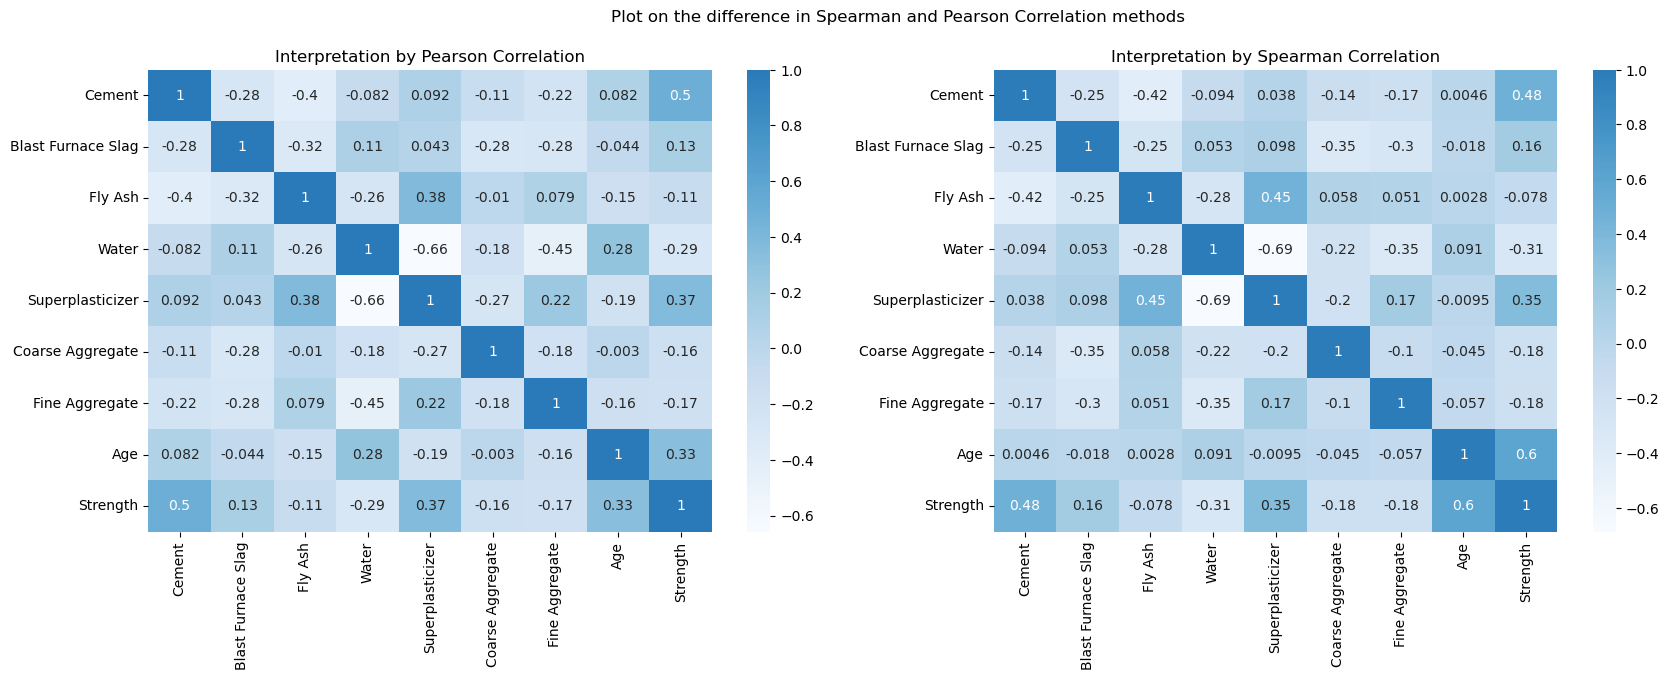

In [28]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.heatmap(concrete_data_corr_pearson, annot=True, center=0.5, cmap='Blues')
plt.title('Interpretation by Pearson Correlation')
plt.subplot(1, 2, 2)
sns.heatmap(concrete_data_corr_spearman, annot=True, center=0.5, cmap='Blues')
plt.title('Interpretation by Spearman Correlation')
plt.suptitle('Plot on the difference in Spearman and Pearson Correlation methods')
plt.show()

In [26]:
from sklearn.preprocessing import Normalizer

In [ ]:
norm_data = Normalizer()